In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
df_India= pd.read_csv('covid_19_India.csv')
India_coord = pd.read_excel('Indian Coordinates.xlsx')
#guys i will send you these files and these are 
#the file you have to use for your project

In [3]:
print(df_India.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       2450 non-null   int64 
 1   Date                      2450 non-null   object
 2   Time                      2450 non-null   object
 3   State/UnionTerritory      2450 non-null   object
 4   ConfirmedIndianNational   2450 non-null   object
 5   ConfirmedForeignNational  2450 non-null   object
 6   Cured                     2450 non-null   int64 
 7   Deaths                    2450 non-null   int64 
 8   Confirmed                 2450 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 172.4+ KB
None


In [4]:
df_India.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [5]:
df_India.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2445,2446,29/05/20,8:00 AM,Tripura,-,-,165,0,230
2446,2447,29/05/20,8:00 AM,Uttarakhand,-,-,79,4,469
2447,2448,29/05/20,8:00 AM,Uttar Pradesh,-,-,3991,182,6991
2448,2449,29/05/20,8:00 AM,West Bengal,-,-,1578,289,4192
2449,2450,29/05/20,8:00 AM,Cases being reassigned to states,-,-,0,0,4332


In [6]:
df_India.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [7]:
print(India_coord.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name of State / UT  35 non-null     object 
 1   Latitude            35 non-null     float64
 2   Longitude           35 non-null     float64
dtypes: float64(2), object(1)
memory usage: 968.0+ bytes
None


In [8]:
India_coord.head()

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [9]:
def replace_dash_with_zeros(inp):
    return int(inp.replace("-","0"))

df_India.drop(['Sno'],axis=1,inplace=True)
df_India['Date'] = pd.to_datetime(df_India['Date'], format = "%d/%m/%y")
# https://www.stat.berkeley.edu/~s133/dates.html
df_India['ConfirmedIndianNational'] = df_India['ConfirmedIndianNational'].apply(replace_dash_with_zeros)
df_India['ConfirmedForeignNational'] = df_India['ConfirmedForeignNational'].apply(replace_dash_with_zeros)
df_India.sort_values("Confirmed", ascending = False, inplace = True)
df_India

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2397,2020-05-28,8:00 AM,Maharashtra,0,0,17918,1897,56948
2433,2020-05-29,8:00 AM,Maharashtra,0,0,17918,1897,56948
2361,2020-05-27,8:00 AM,Maharashtra,0,0,16954,1792,54758
2325,2020-05-26,8:00 AM,Maharashtra,0,0,15786,1695,52667
2290,2020-05-25,8:00 AM,Maharashtra,0,0,14600,1635,50231
...,...,...,...,...,...,...,...,...
1047,2020-04-17,5:00 PM,Nagaland,0,0,0,0,0
1179,2020-04-21,5:00 PM,Nagaland,0,0,0,0,0
981,2020-04-15,5:00 PM,Nagaland,0,0,0,0,0
1113,2020-04-19,5:00 PM,Nagaland,0,0,0,0,0


In [10]:
df_India.loc[df_India["ConfirmedForeignNational"] == "-",:]

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed


In [11]:
list(zip(df_India.columns,df_India.dtypes,df_India.isna().sum()))

[('Date', dtype('<M8[ns]'), 0),
 ('Time', dtype('O'), 0),
 ('State/UnionTerritory', dtype('O'), 0),
 ('ConfirmedIndianNational', dtype('int64'), 0),
 ('ConfirmedForeignNational', dtype('int64'), 0),
 ('Cured', dtype('int64'), 0),
 ('Deaths', dtype('int64'), 0),
 ('Confirmed', dtype('int64'), 0)]

In [12]:
print(f'We have data available from : {df_India.Date.min()} to {df_India.Date.max()}')

We have data available from : 2020-01-30 00:00:00 to 2020-05-29 00:00:00


In [13]:
df_India.groupby(["State/UnionTerritory", "Date"]).sum()

ConfirmedIndianNational  \
State/UnionTerritory        Date                                  
Andaman and Nicobar Islands 2020-03-26                        1   
                            2020-03-27                        1   
                            2020-03-28                        6   
                            2020-03-29                        0   
                            2020-03-30                        0   
...                                                         ...   
West Bengal                 2020-05-25                        0   
                            2020-05-26                        0   
                            2020-05-27                        0   
                            2020-05-28                        0   
                            2020-05-29                        0   

                                        ConfirmedForeignNational  Cured  \
State/UnionTerritory        Date                                          
Andaman and Nicobar Islands 2020-03-26                         0      0   
                            2020-03-27                         0      0   
                            2020-03-28                         0      0   
                            2020-03-29                         0      0   
                            2020-03-30                         0      0   
...                                                          ...    ...   
West Bengal                 2020-05-25                         0   1339   
                            2020-05-26                         0   1414   
                            2020-05-27                         0   1486   
                            2020-05-28                         0   1578   
                            2020-05-29                         0   1578   

                                        Deaths  Confirmed  
State/UnionTerritory        Date                           
Andaman and Nicobar Islands 2020-03-26       0          1  
                            2020-03-27       0          1  
                            2020-03-28       0          6  
                            2020-03-29       0          9  
                            2020-03-30       0          9  
...                                        ...        ...  
West Bengal                 2020-05-25     272       3667  
                            2020-05-26     278       3816  
                            2020-05-27     283       4009  
                            2020-05-28     289       4192  
                            2020-05-29     289       4192  

[2450 rows x 5 columns]

In [14]:
States = df_India['State/UnionTerritory'].unique().tolist()
States

['Maharashtra',
 'Tamil Nadu',
 'Delhi',
 'Gujarat',
 'Rajasthan',
 'Madhya Pradesh',
 'Uttar Pradesh',
 'Cases being reassigned to states',
 'West Bengal',
 'Andhra Pradesh',
 'Bihar',
 'Karnataka',
 'Punjab',
 'Telengana',
 'Jammu and Kashmir',
 'Odisha',
 'Haryana',
 'Kerala',
 'Assam',
 'Uttarakhand',
 'Jharkhand',
 'Chhattisgarh',
 'Chandigarh',
 'Himachal Pradesh',
 'Tripura',
 'Unassigned',
 'Goa',
 'Ladakh',
 'Puducherry',
 'Manipur',
 'Andaman and Nicobar Islands',
 'Meghalaya',
 'Nagaland',
 'Arunachal Pradesh',
 'Dadar Nagar Haveli',
 'Sikkim',
 'Mizoram']

In [15]:
States.remove("Cases being reassigned to states")
States.remove("Unassigned")
States

['Maharashtra',
 'Tamil Nadu',
 'Delhi',
 'Gujarat',
 'Rajasthan',
 'Madhya Pradesh',
 'Uttar Pradesh',
 'West Bengal',
 'Andhra Pradesh',
 'Bihar',
 'Karnataka',
 'Punjab',
 'Telengana',
 'Jammu and Kashmir',
 'Odisha',
 'Haryana',
 'Kerala',
 'Assam',
 'Uttarakhand',
 'Jharkhand',
 'Chhattisgarh',
 'Chandigarh',
 'Himachal Pradesh',
 'Tripura',
 'Goa',
 'Ladakh',
 'Puducherry',
 'Manipur',
 'Andaman and Nicobar Islands',
 'Meghalaya',
 'Nagaland',
 'Arunachal Pradesh',
 'Dadar Nagar Haveli',
 'Sikkim',
 'Mizoram']

In [16]:
len(States)

35

## Merging Data Frames

In [17]:
df_final_India = pd.DataFrame()
dates = pd.DataFrame({"Date": pd.date_range(df_India.Date.min(),df_India.Date.max())})
for state in States:
    all_dates_df = pd.merge(dates, 
                            df_India.loc[df_India['State/UnionTerritory'] == state,:], on = "Date",
                           how = "left")
    all_dates_df['State/UnionTerritory'] = state
    all_dates_df = all_dates_df.fillna(0)
    all_dates_df['New Cases'] = all_dates_df['Confirmed'] - all_dates_df['Confirmed'].shift(1)
#     print(state)
#     display(all_dates_df.loc[all_dates_df['New Cases'] <  0,:])
    df_final_India = pd.concat([df_final_India, all_dates_df],axis = 0)
print("Finally we have a data of Size: ",df_final_India.shape)
df_final_India.head()

Finally we have a data of Size:  (4235, 9)


,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,New Cases
0,2020-01-30,0,Maharashtra,0.0,0.0,0.0,0.0,0.0,NaN
1,2020-01-31,0,Maharashtra,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-02-01,0,Maharashtra,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-02-02,0,Maharashtra,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-02-03,0,Maharashtra,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_final_India.dropna(inplace = True)
df_final_India.shape


(4200, 9)

In [20]:
del df_final_India['Time']
del df_final_India['ConfirmedIndianNational']
del df_final_India['ConfirmedForeignNational']

In [21]:
df_final_India

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,New Cases
1,2020-01-31,Maharashtra,0.0,0.0,0.0,0.0
2,2020-02-01,Maharashtra,0.0,0.0,0.0,0.0
3,2020-02-02,Maharashtra,0.0,0.0,0.0,0.0
4,2020-02-03,Maharashtra,0.0,0.0,0.0,0.0
5,2020-02-04,Maharashtra,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
116,2020-05-25,Mizoram,1.0,0.0,1.0,0.0
117,2020-05-26,Mizoram,1.0,0.0,1.0,0.0
118,2020-05-27,Mizoram,1.0,0.0,1.0,0.0
119,2020-05-28,Mizoram,1.0,0.0,1.0,0.0


In [22]:
df_final_India.groupby(["State/UnionTerritory", "Date"]).sum()

Cured  Deaths  Confirmed  New Cases
State/UnionTerritory        Date                                            
Andaman and Nicobar Islands 2020-01-31     0.0     0.0        0.0        0.0
                            2020-02-01     0.0     0.0        0.0        0.0
                            2020-02-02     0.0     0.0        0.0        0.0
                            2020-02-03     0.0     0.0        0.0        0.0
                            2020-02-04     0.0     0.0        0.0        0.0
...                                        ...     ...        ...        ...
West Bengal                 2020-05-25  1339.0   272.0     3667.0      208.0
                            2020-05-26  1414.0   278.0     3816.0      149.0
                            2020-05-27  1486.0   283.0     4009.0      193.0
                            2020-05-28  1578.0   289.0     4192.0      183.0
                            2020-05-29  1578.0   289.0     4192.0        0.0

[4200 rows x 4 columns]

In [23]:
df_final_India = df_final_India.groupby(["State/UnionTerritory", "Date"]).sum().reset_index()
df_final_India

,State/UnionTerritory,Date,Cured,Deaths,Confirmed,New Cases
0,Andaman and Nicobar Islands,2020-01-31,0.0,0.0,0.0,0.0
1,Andaman and Nicobar Islands,2020-02-01,0.0,0.0,0.0,0.0
2,Andaman and Nicobar Islands,2020-02-02,0.0,0.0,0.0,0.0
3,Andaman and Nicobar Islands,2020-02-03,0.0,0.0,0.0,0.0
4,Andaman and Nicobar Islands,2020-02-04,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
4195,West Bengal,2020-05-25,1339.0,272.0,3667.0,208.0
4196,West Bengal,2020-05-26,1414.0,278.0,3816.0,149.0
4197,West Bengal,2020-05-27,1486.0,283.0,4009.0,193.0
4198,West Bengal,2020-05-28,1578.0,289.0,4192.0,183.0


# Statewise Covid19 Status in India

In [24]:
def plot_pie(active,cured,death,title):
    labels = ['Active','Recovered','Died']
    sizes = [active,cured,death]
    color= ['#66b3ff','green','red']
    explode = []

    for i in labels:
        explode.append(0.05)
    
    plt.figure(figsize= (15,6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode,colors = color)
    centre_circle = plt.Circle((0,0),0.70,fc='white')

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title +  'COVID-19 Cases',fontsize = 20)
    plt.axis('equal')  
    plt.tight_layout()

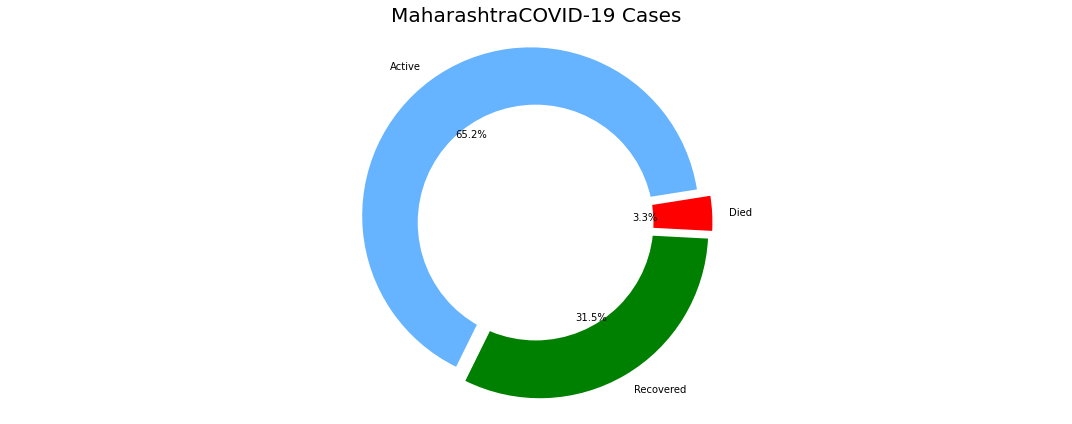

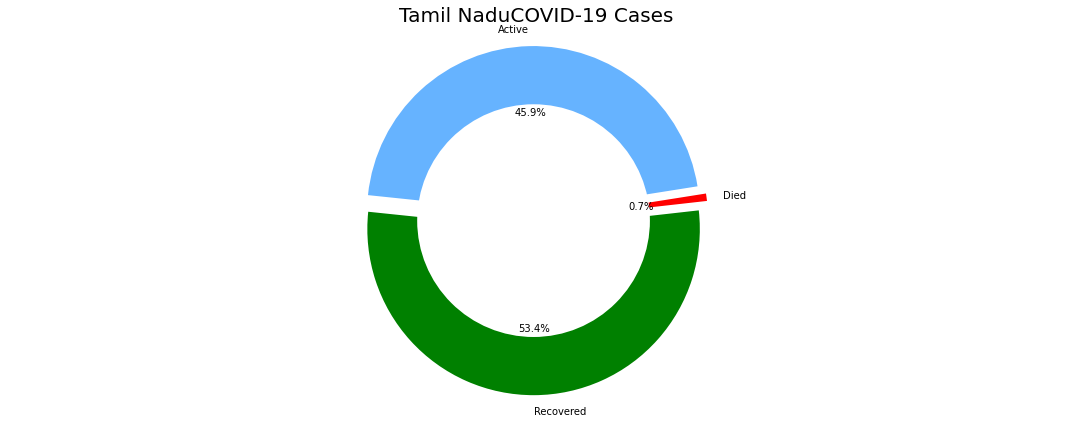

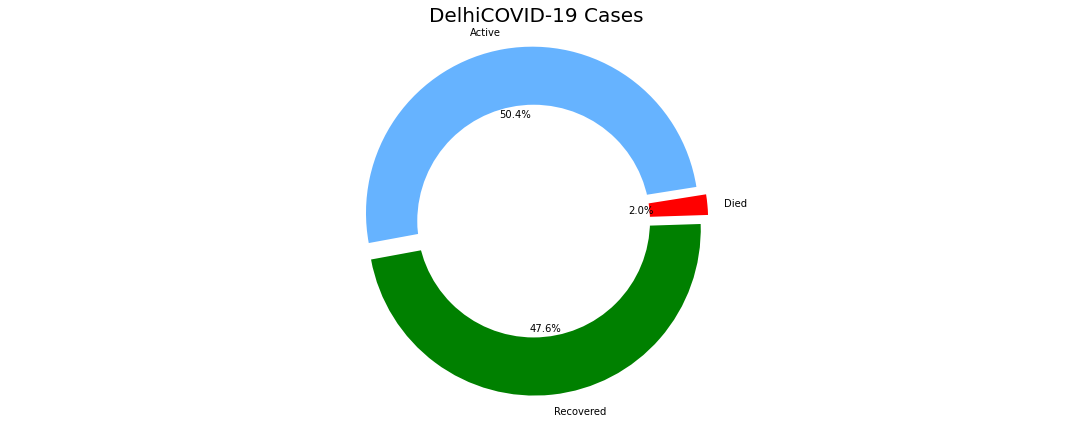

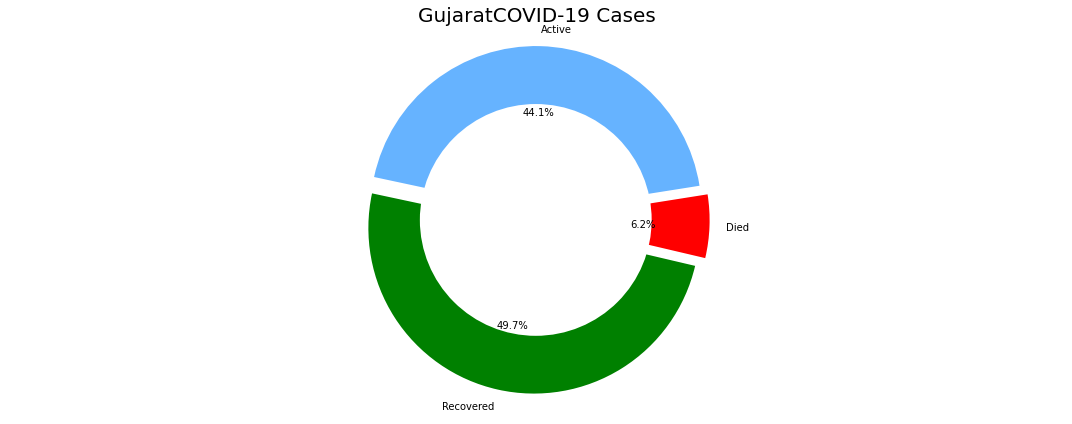

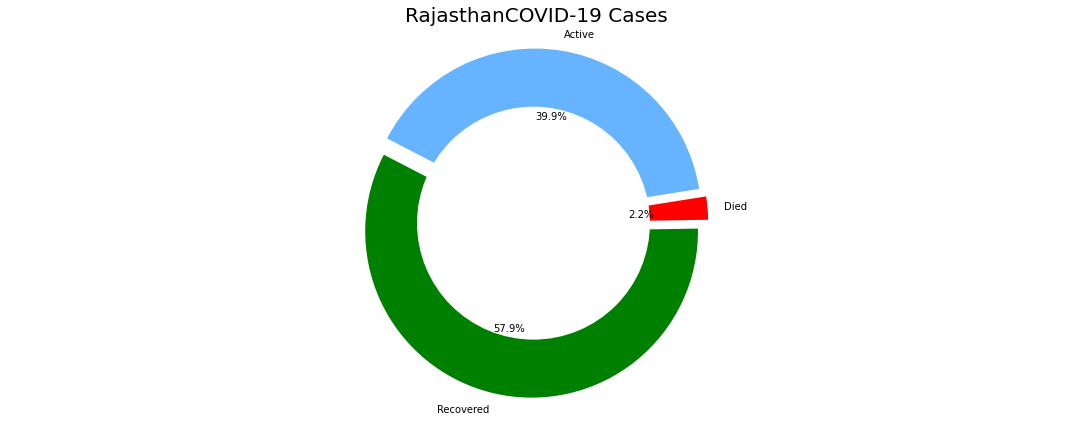

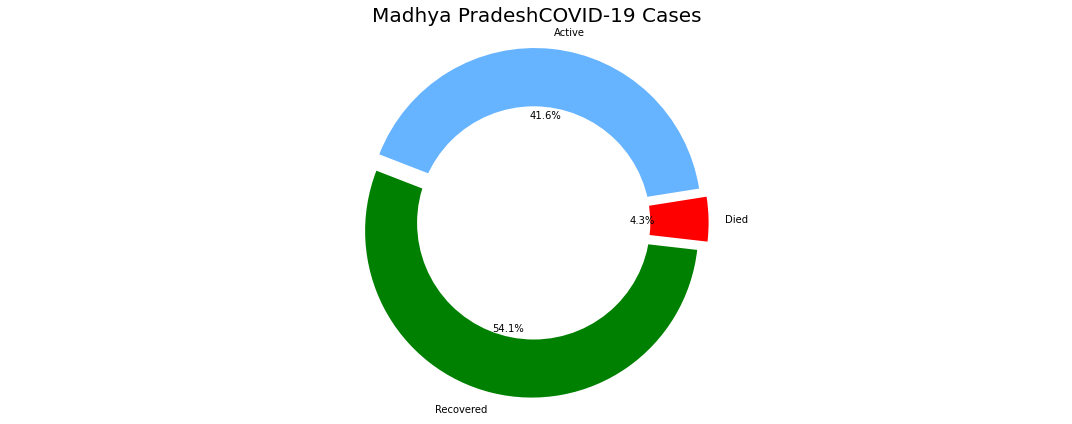

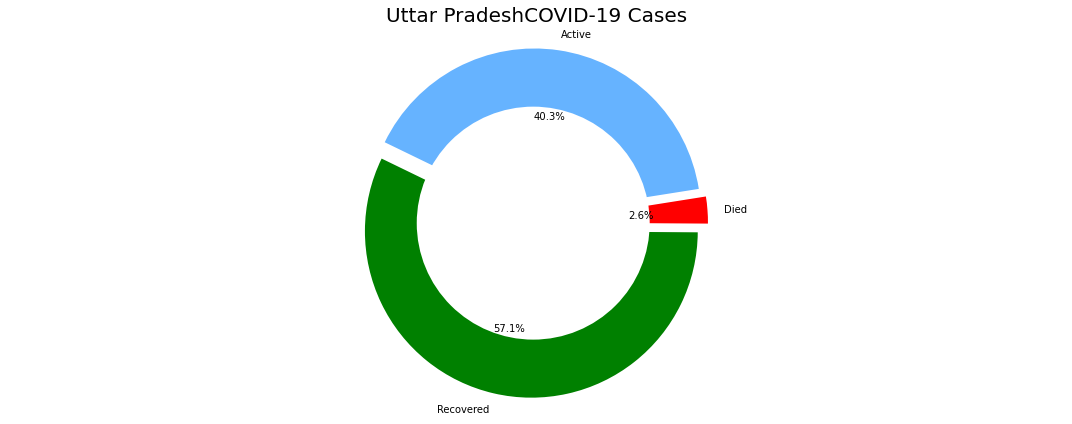

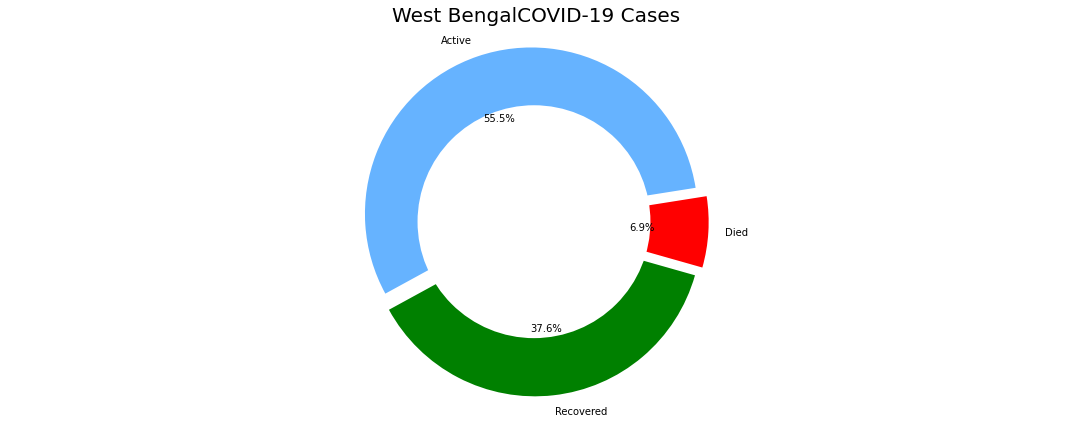

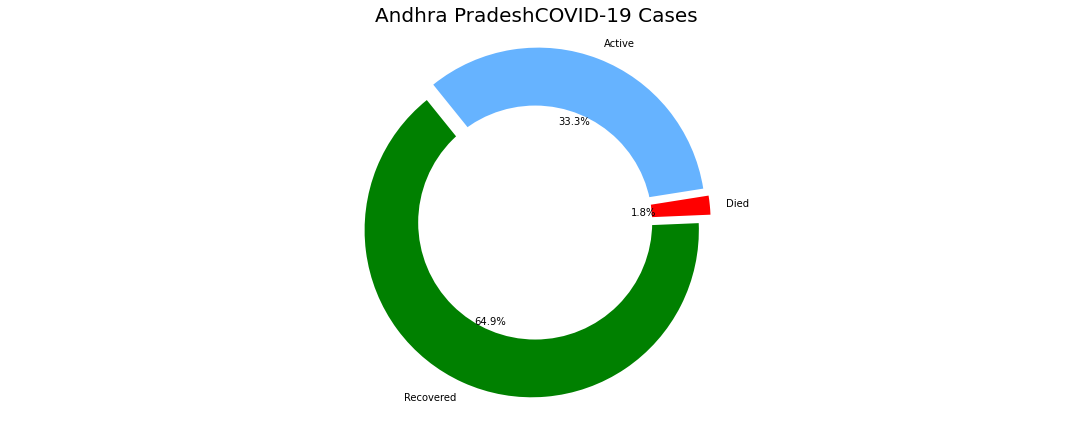

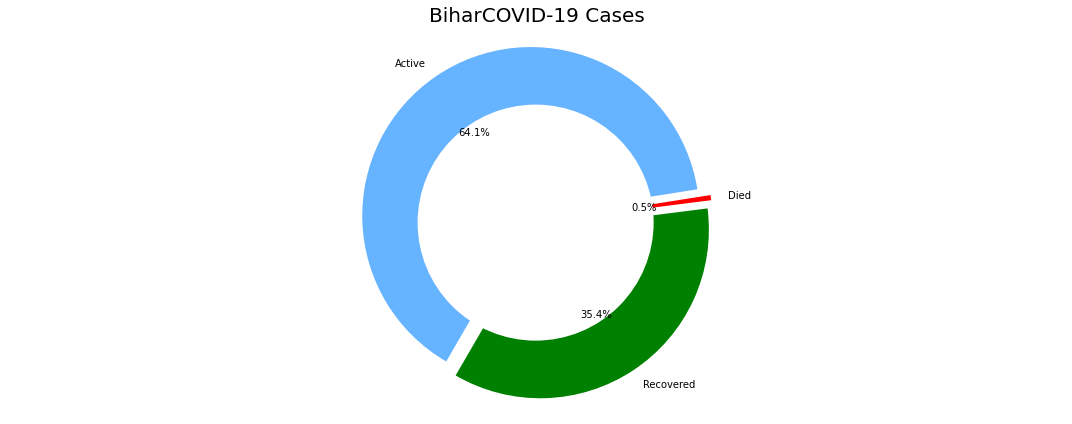

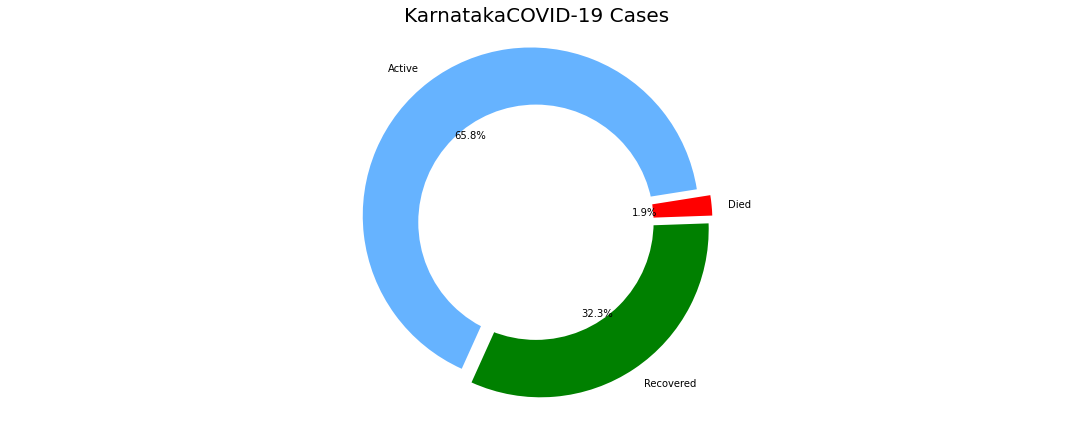

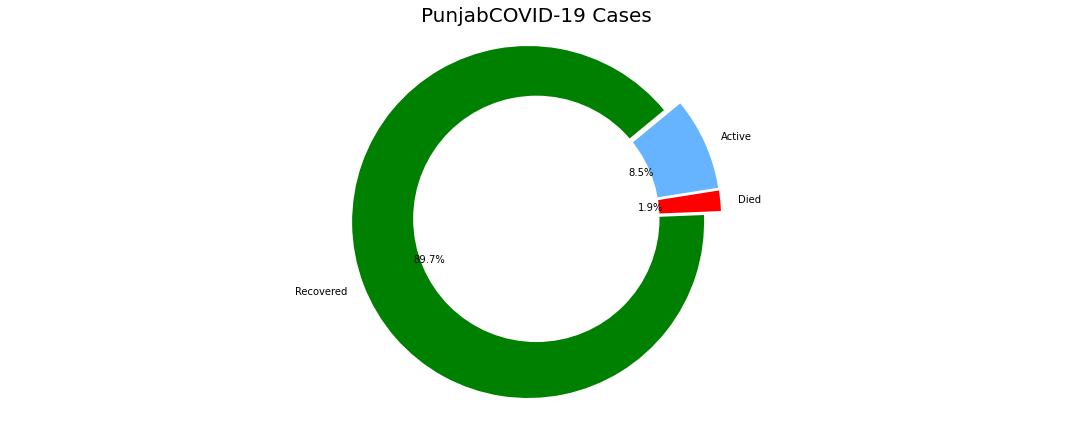

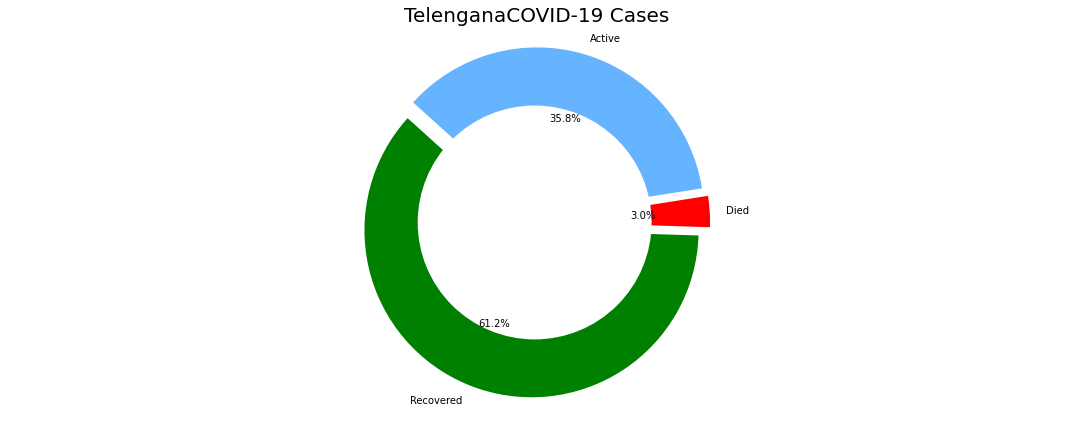

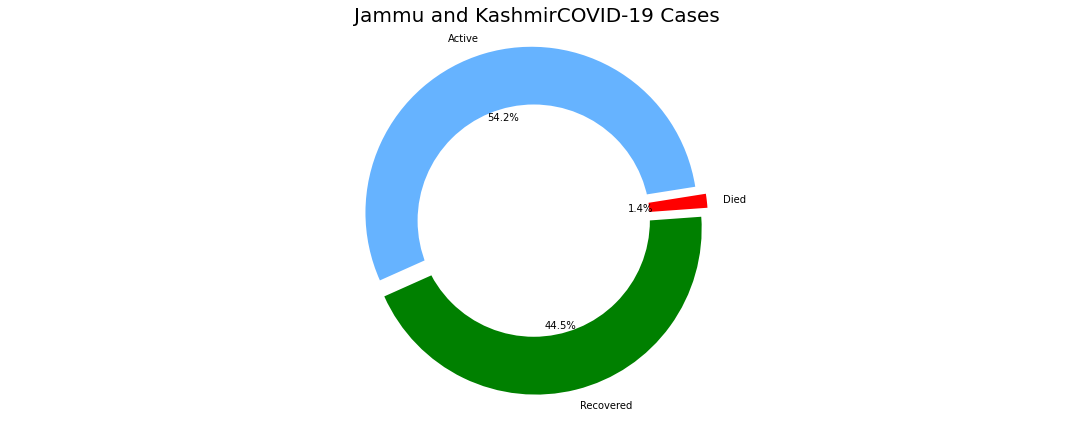

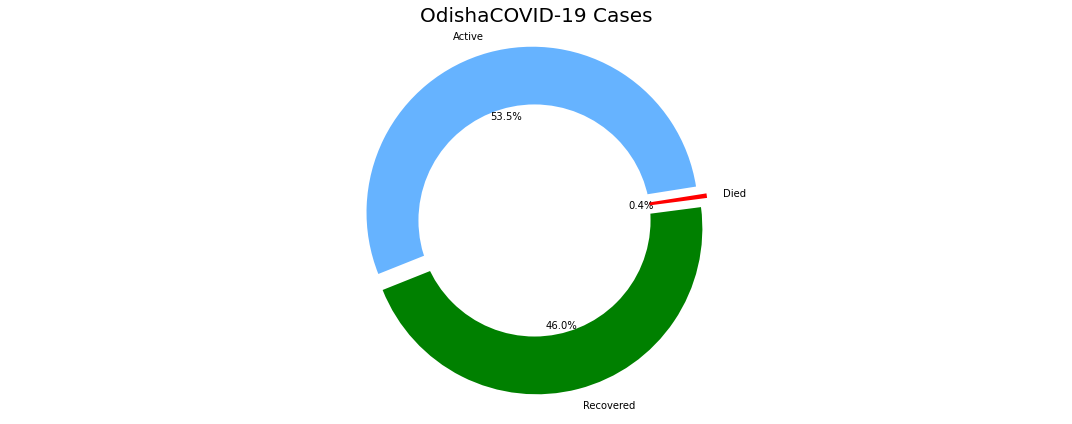

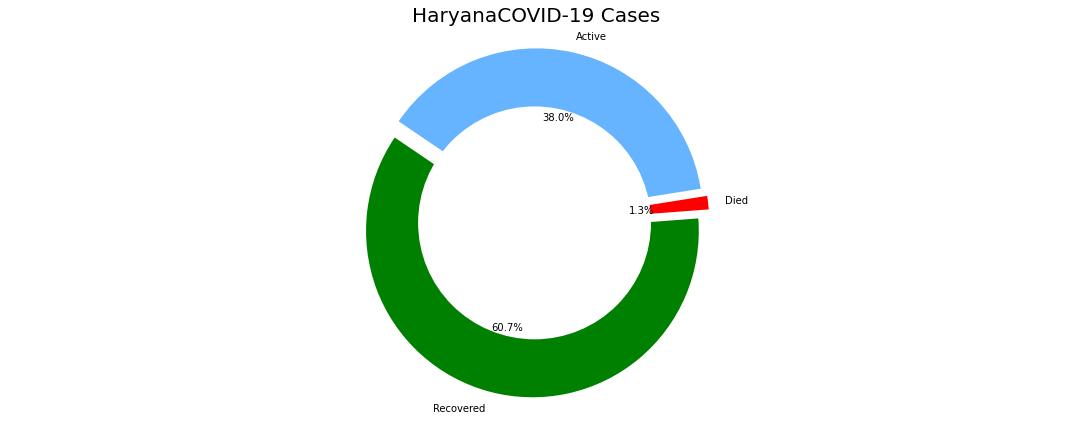

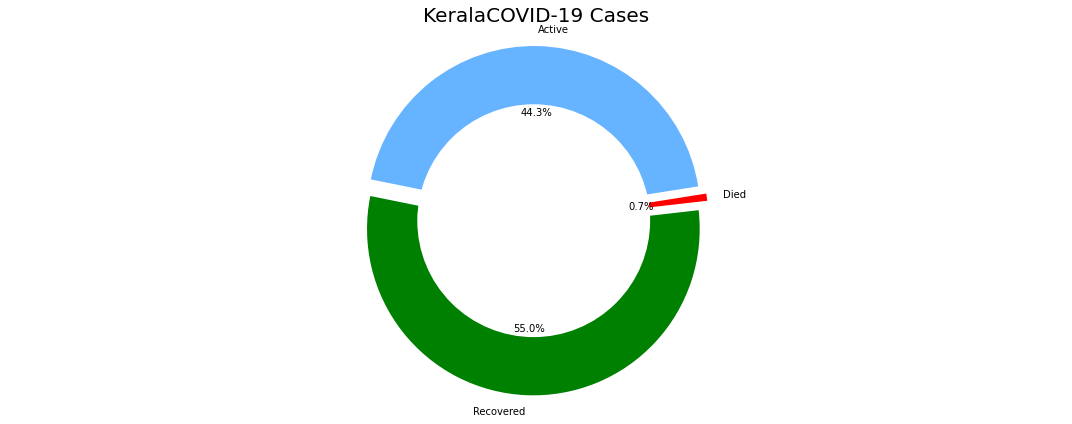

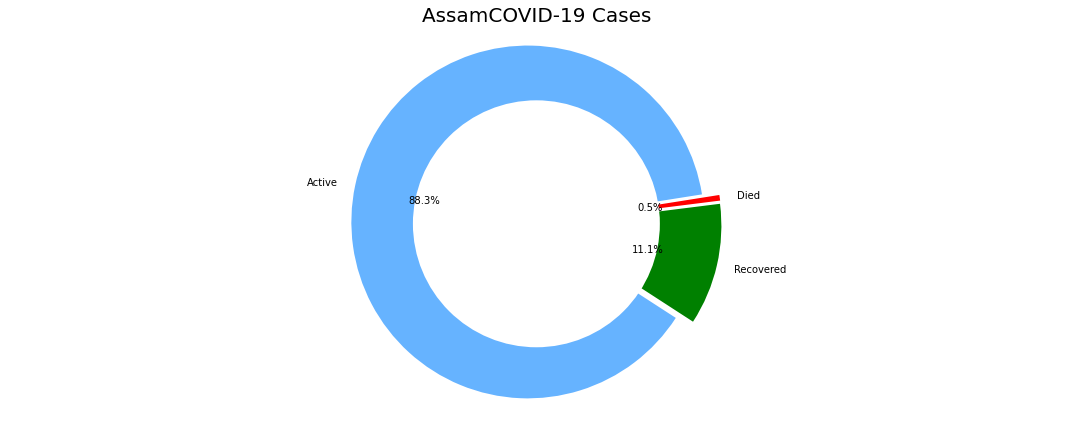

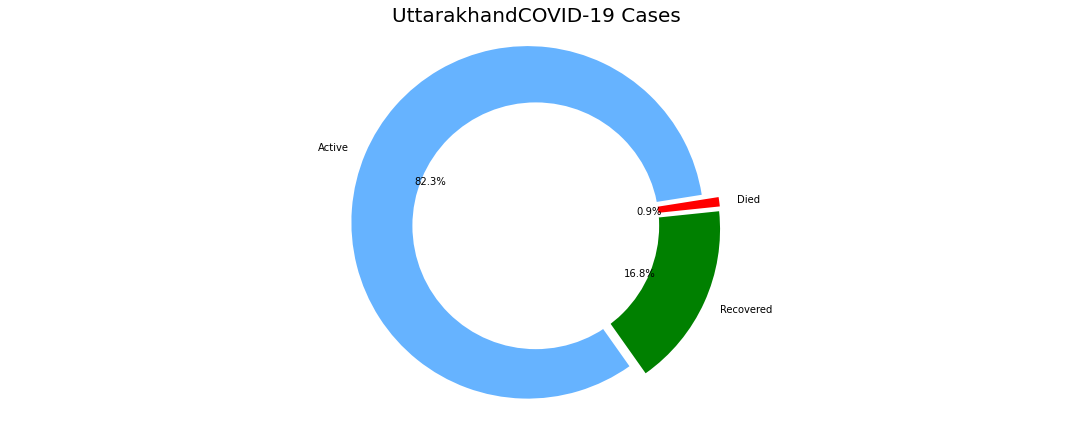

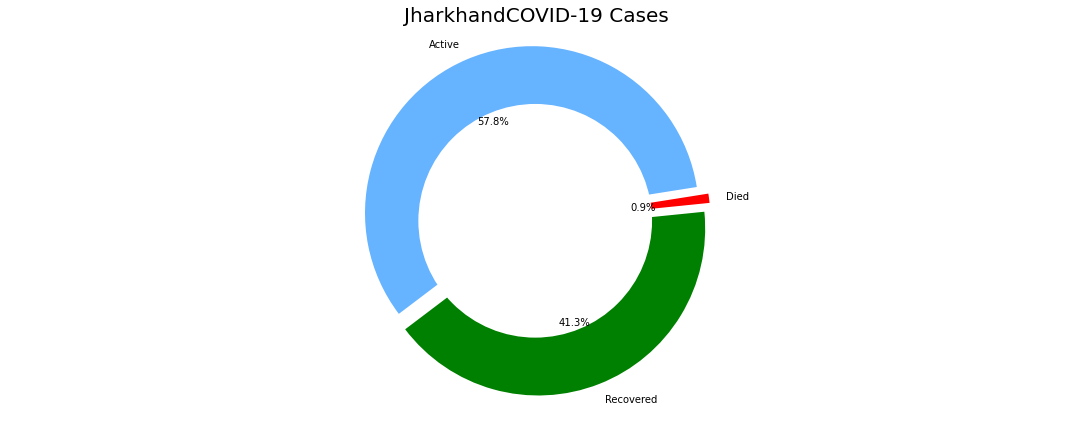

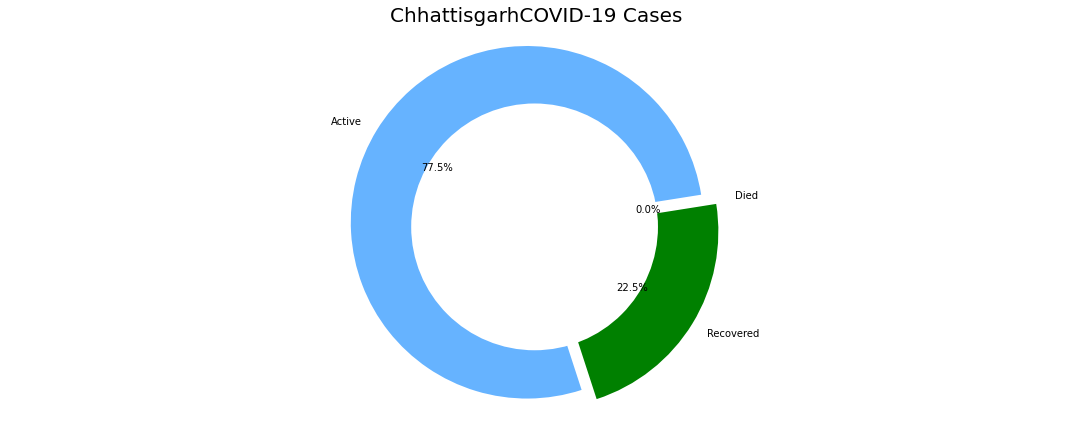

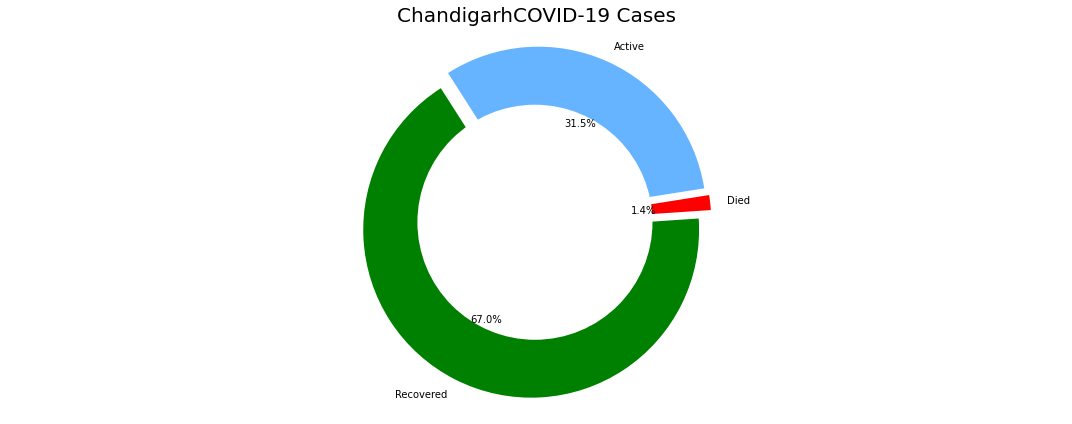

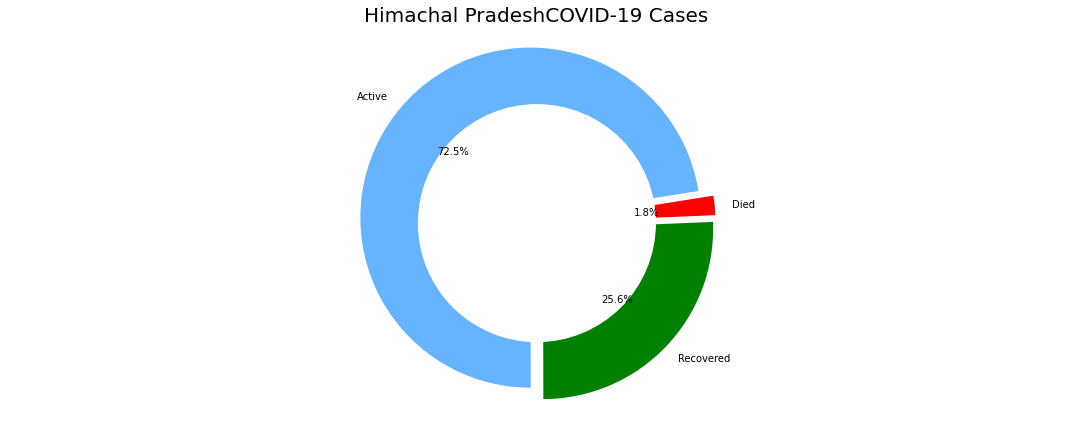

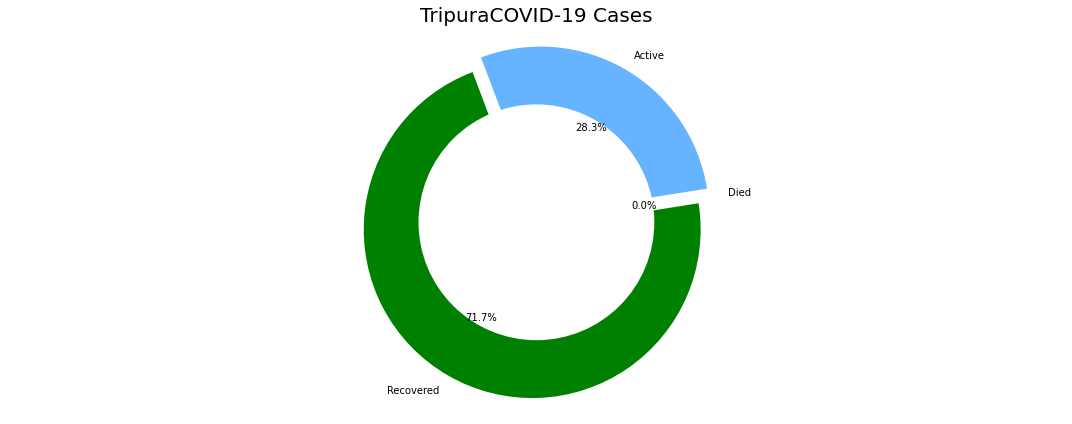

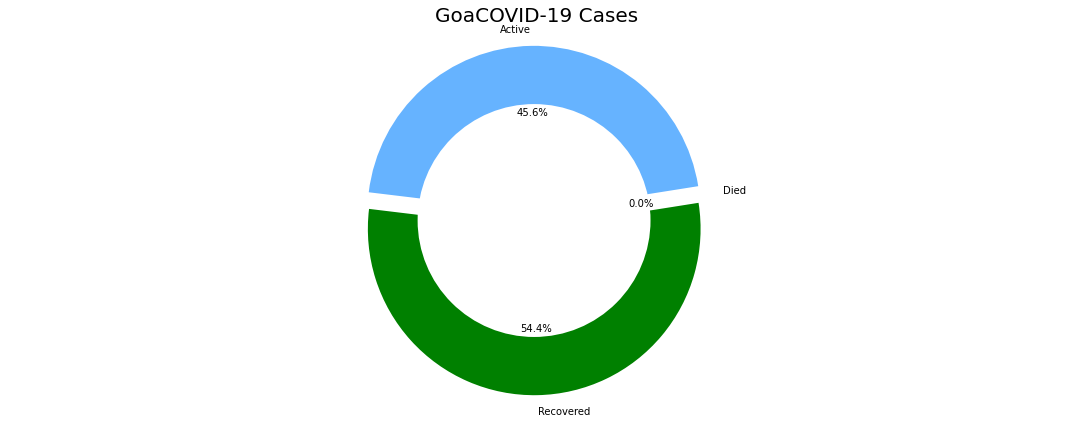

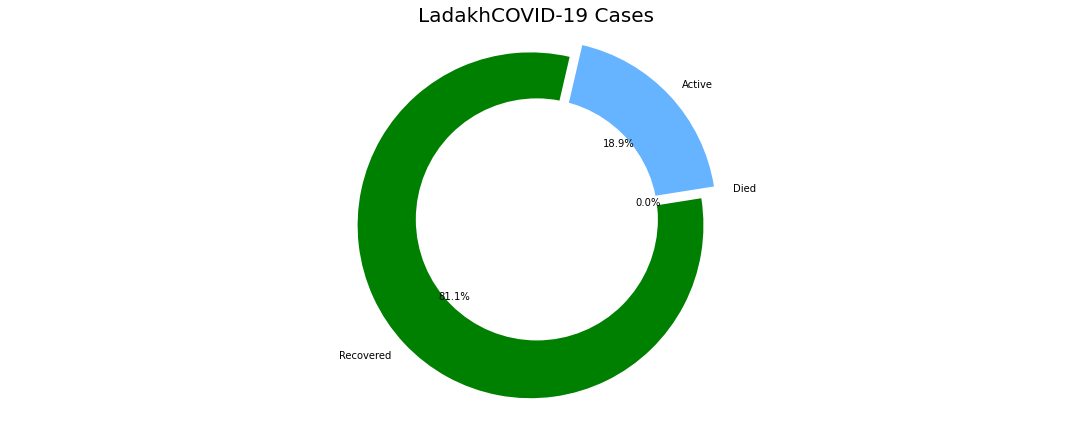

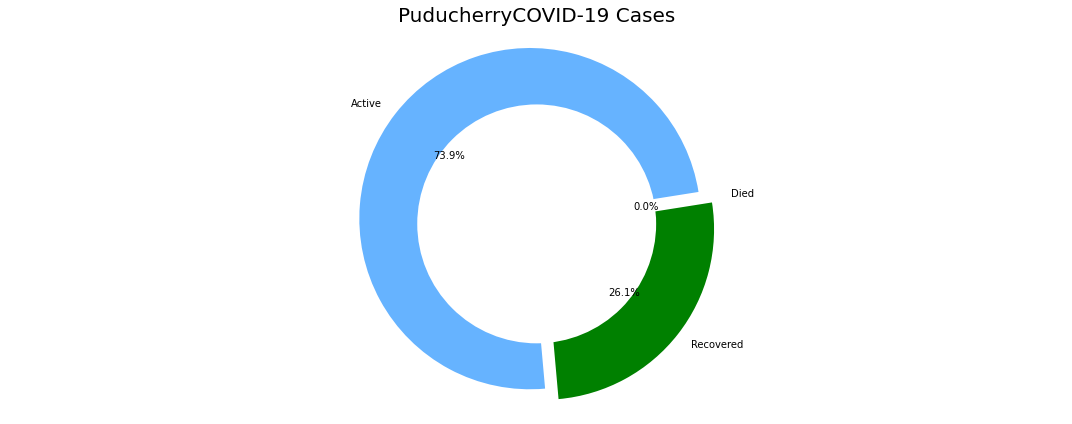

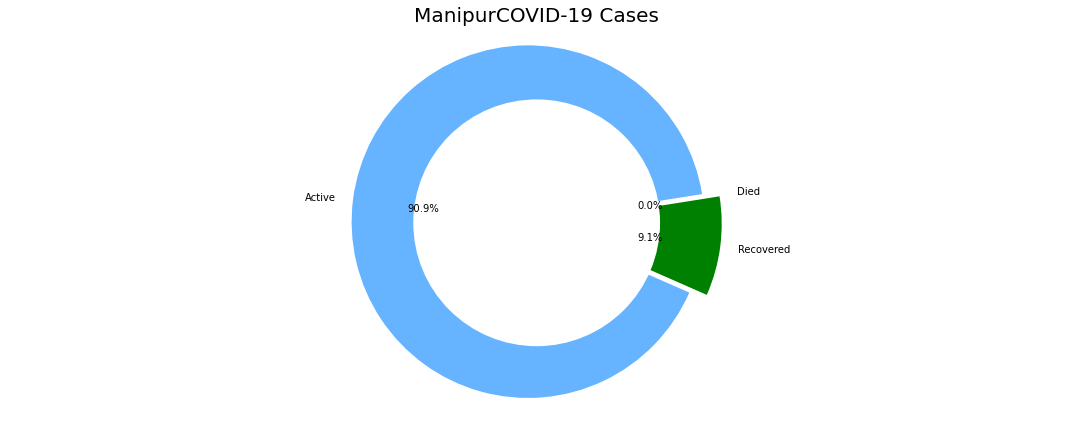

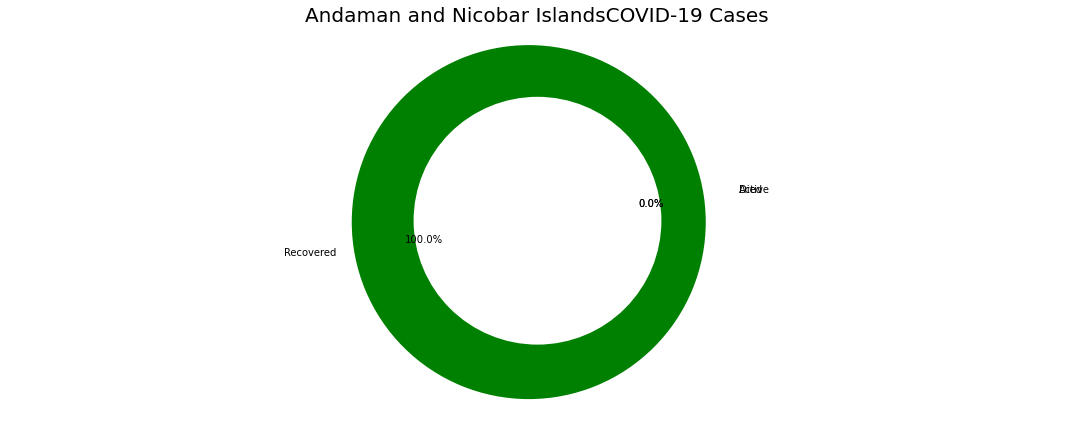

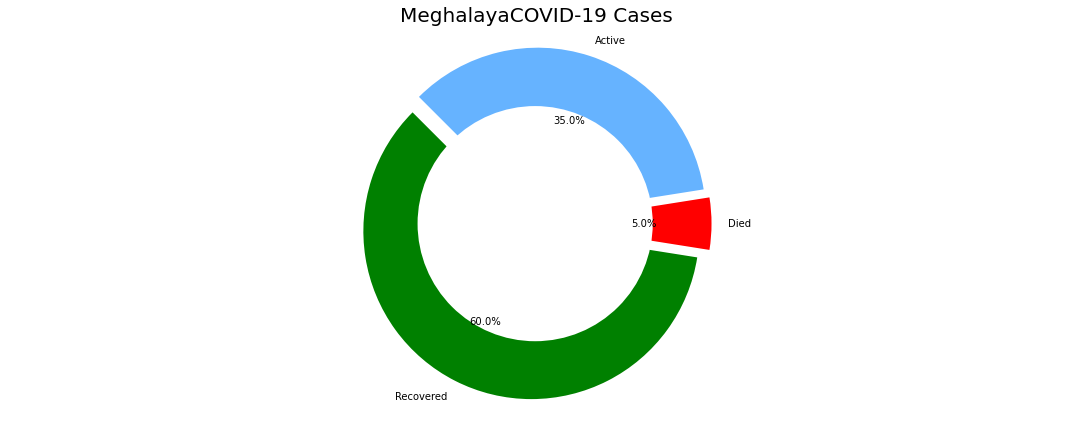

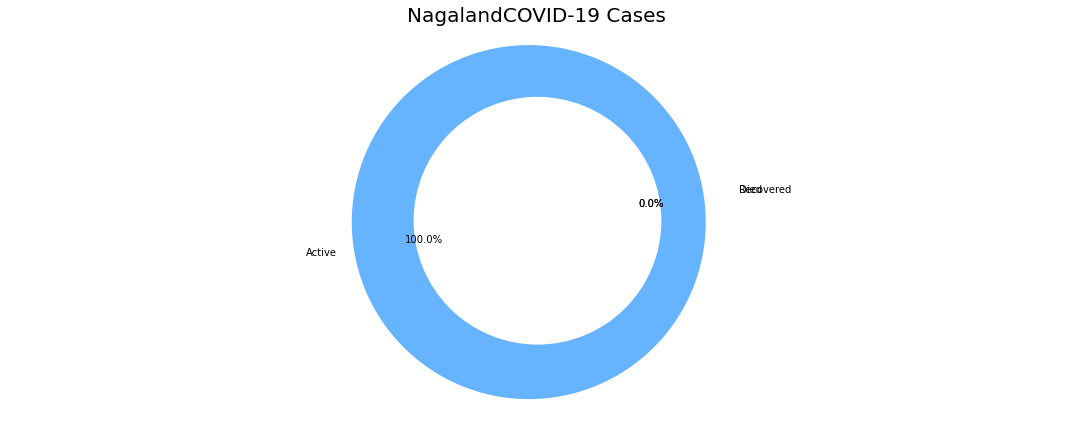

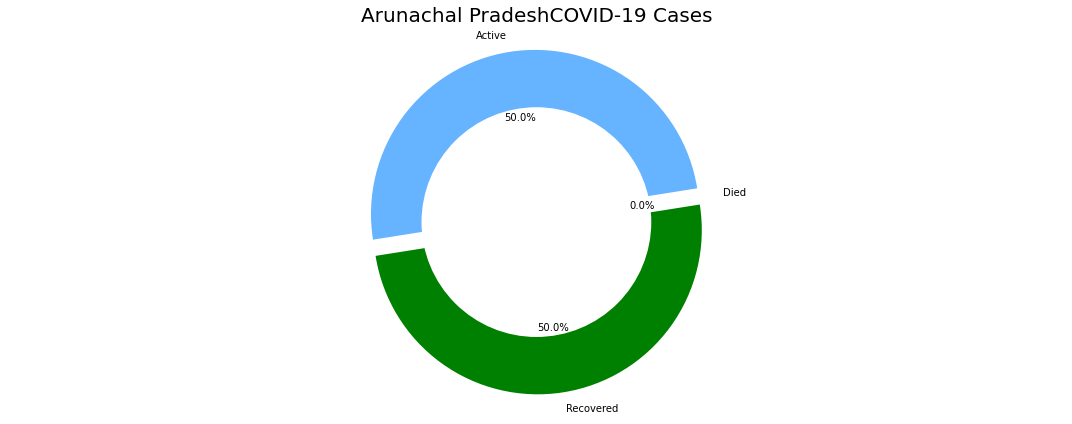

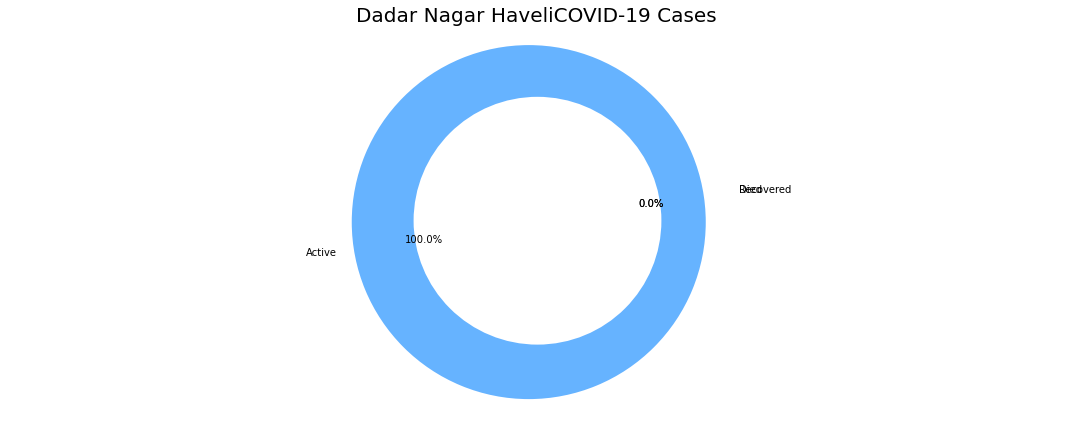

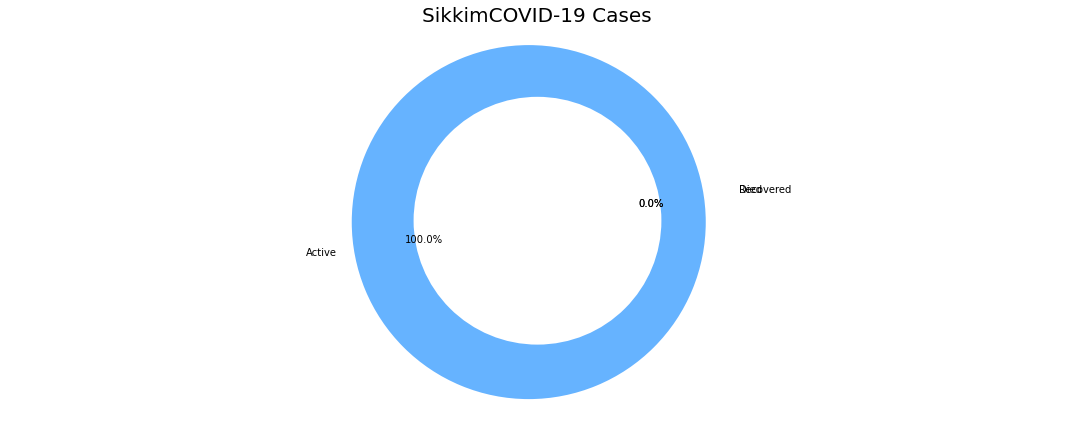

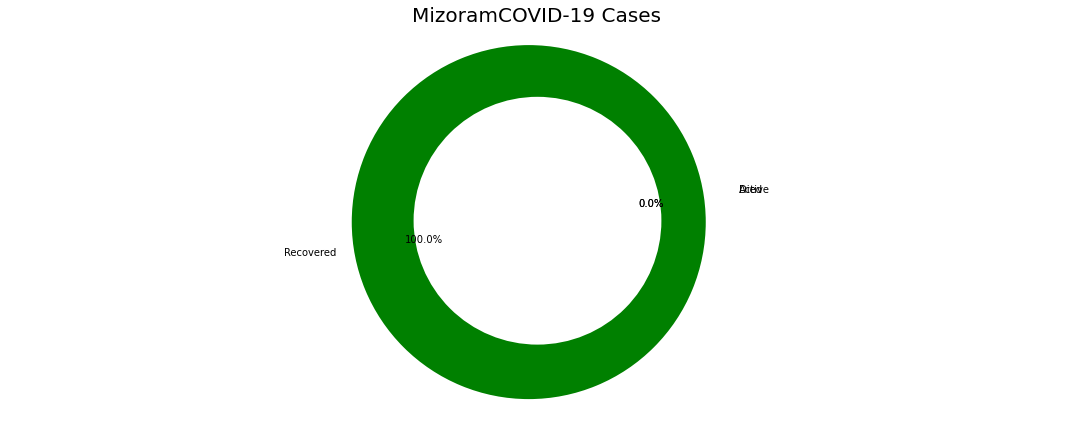

In [25]:
total_cases_india = 0
cured_cases_india = 0
death_cases_india = 0
active_cases_india = 0
state_df = pd.DataFrame()

for state in States:
    one_state_df = df_final_India.loc[df_final_India['State/UnionTerritory'] == state,:]
    state_df = pd.concat([state_df,pd.DataFrame(one_state_df.iloc[-1,:]).T],axis = 0)
    total_cases = one_state_df['Confirmed'].values[-1]
    cured = one_state_df['Cured'].values[-1]
    deaths = one_state_df['Deaths'].values[-1]
    active = total_cases - cured - deaths
    plot_pie(active, cured, deaths,state)
    total_cases_india += total_cases
    cured_cases_india += cured
    death_cases_india += deaths
    active_cases_india += active

In [26]:
state_df.reset_index(inplace = True,drop = True)
state_df

,State/UnionTerritory,Date,Cured,Deaths,Confirmed,New Cases
0,Maharashtra,2020-05-29,17918,1897,56948,0
1,Tamil Nadu,2020-05-29,9909,133,18545,0
2,Delhi,2020-05-29,7264,303,15257,0
3,Gujarat,2020-05-29,7549,938,15195,0
4,Rajasthan,2020-05-29,4457,173,7703,0
5,Madhya Pradesh,2020-05-29,3927,313,7261,0
6,Uttar Pradesh,2020-05-29,3991,182,6991,0
7,West Bengal,2020-05-29,1578,289,4192,0
8,Andhra Pradesh,2020-05-29,2057,58,3171,0
9,Bihar,2020-05-29,1083,15,3061,0


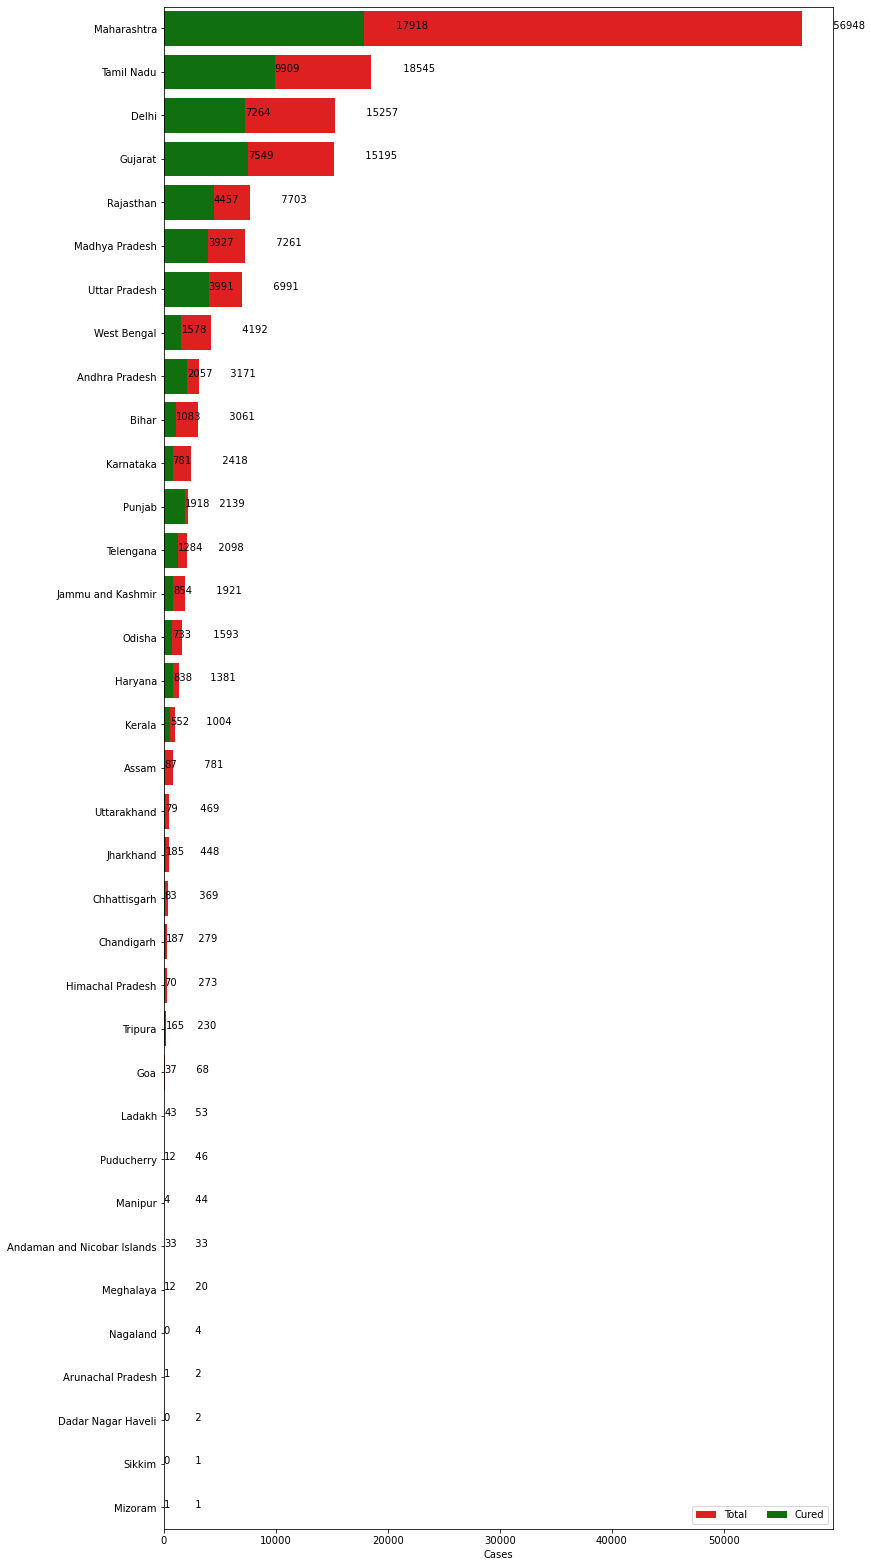

In [27]:
f, ax = plt.subplots(figsize=(12, 28))
data = state_df[['State/UnionTerritory','Confirmed','Cured','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="green")
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="Cases")
i = 0
for p in ax.patches:
    x = p.get_x() + p.get_width() + 3
    y = p.get_y() + p.get_height()/2
    if i <= len(States):
        ax.annotate(" "*10 + str(int(p.get_width())), (x, y))
    else:
        ax.annotate(int(p.get_width()), (x, y))
        
    i += 1


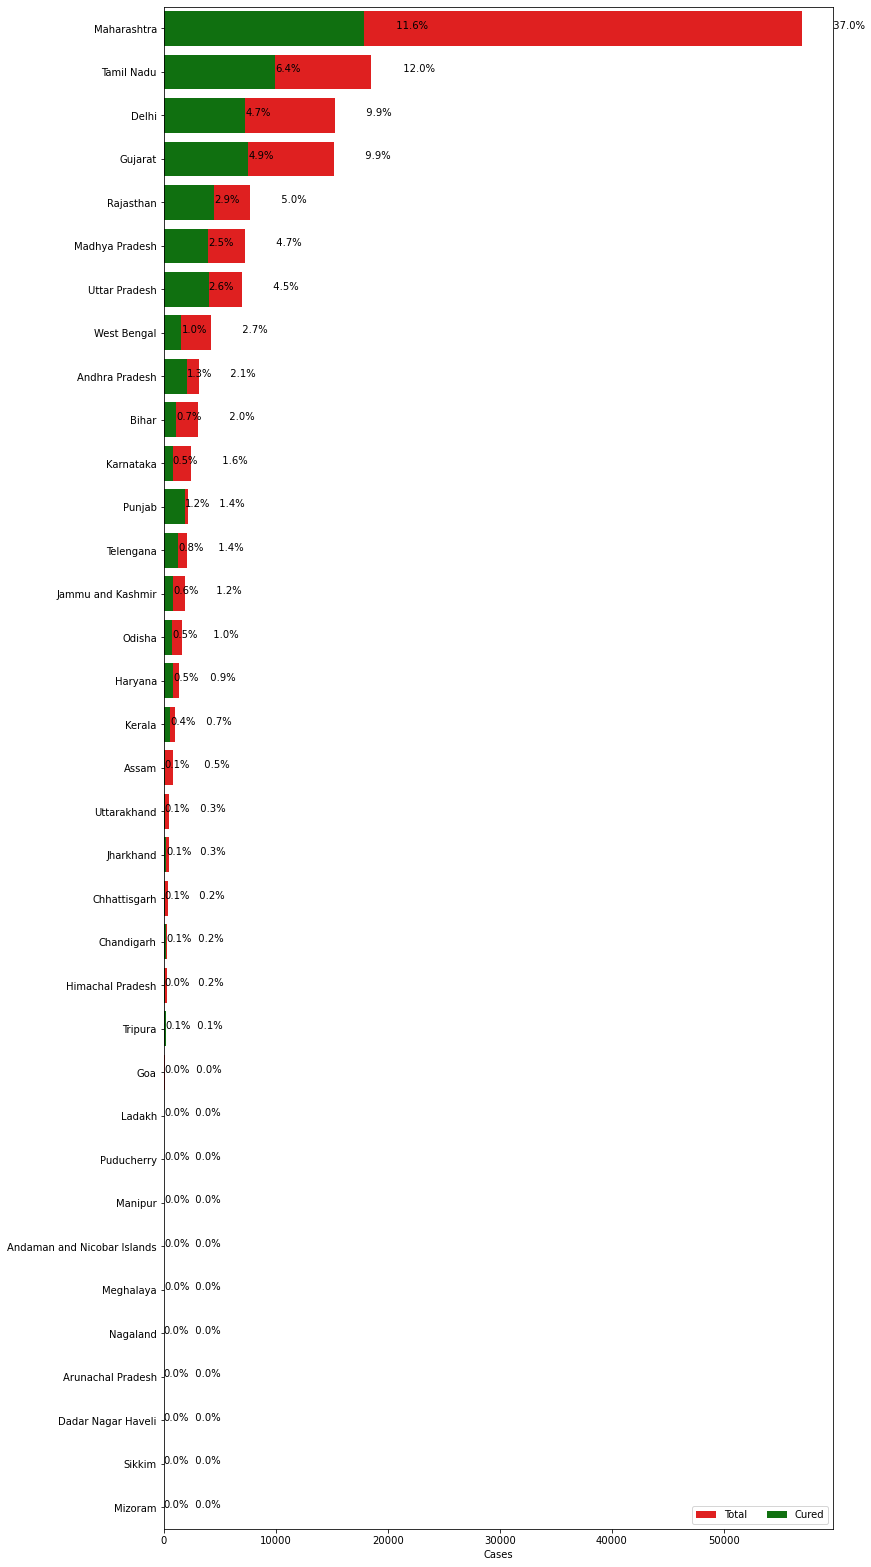

In [28]:
f, ax = plt.subplots(figsize=(12, 28))
data = state_df[['State/UnionTerritory','Confirmed','Cured','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="green")
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="Cases")
total = total_cases_india
i = 0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 3
    y = p.get_y() + p.get_height()/2
    if i <= len(States):
        ax.annotate(" "*10 + str(percentage), (x, y))
    else:
        ax.annotate(percentage, (x, y))
        
    i += 1

# Overall Covid19 Status in India

Total infected cases in India:  154001.0
Total cured cases in India:  67692.0
Total active cases in India:  81778.0
Total death cases in India:  4531.0


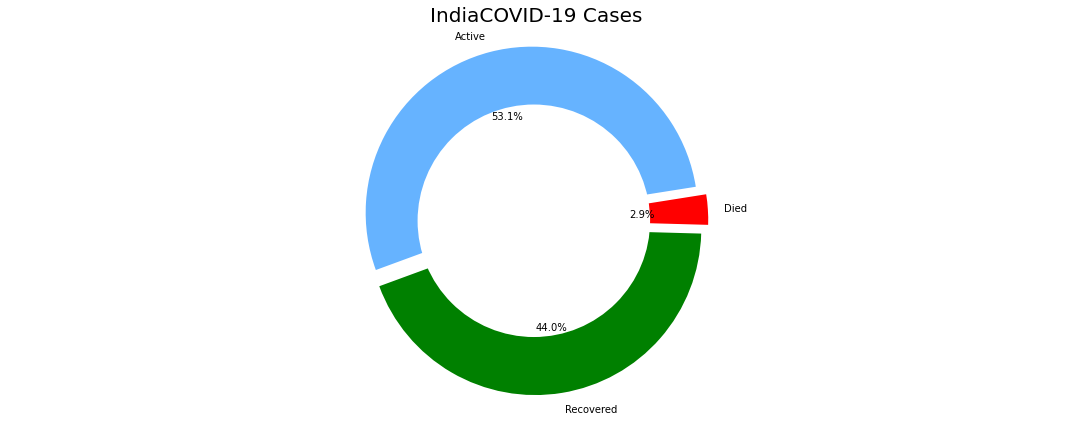

In [29]:
print("Total infected cases in India: ", total_cases_india)
print("Total cured cases in India: ", cured_cases_india)
print("Total active cases in India: ", active_cases_india)
print("Total death cases in India: ", death_cases_india)
plot_pie(active_cases_india, cured_cases_india, death_cases_india, "India")

# VISUALISING THE SPREADS GEOGRAPHICALLY

In [30]:
India_coord.rename(columns = {"Name of State / UT" : "State/UnionTerritory"},inplace = True)

In [31]:
set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Andaman And Nicobar ',
 'Andaman and Nicobar Islands',
 'Arunachal Pradesh',
 'Arunachal Pradesh ',
 'Assam',
 'Assam ',
 'Bihar',
 'Bihar ',
 'Chandigarh',
 'Chandigarh ',
 'Chhattisgarh',
 'Chhattisgarh ',
 'Dadar Nagar Haveli',
 'Dadra And Nagar Haveli ',
 'Goa',
 'Goa ',
 'Gujarat',
 'Himachal Pradesh',
 'Himachal Pradesh ',
 'Jammu and Kashmir',
 'Jharkhand',
 'Jharkhand ',
 'Ladakh',
 'Lakshadweep ',
 'Madhya Pradesh',
 'Madhya Pradesh ',
 'Manipur',
 'Manipur ',
 'Meghalaya',
 'Meghalaya ',
 'Mizoram',
 'Mizoram ',
 'Nagaland',
 'Nagaland ',
 'Odisha',
 'Orissa ',
 'Puducherry',
 'Puducherry ',
 'Sikkim',
 'Sikkim ',
 'Tripura',
 'Tripura ',
 'Union Territory of Jammu and Kashmir',
 'Union Territory of Ladakh',
 'West Bengal',
 'West Bengal '}

In [32]:
India_coord['State/UnionTerritory'] = India_coord['State/UnionTerritory'].str.strip()
state_df['State/UnionTerritory'] = state_df['State/UnionTerritory'].str.strip()

In [33]:
set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Andaman And Nicobar',
 'Andaman and Nicobar Islands',
 'Dadar Nagar Haveli',
 'Dadra And Nagar Haveli',
 'Gujarat',
 'Jammu and Kashmir',
 'Ladakh',
 'Lakshadweep',
 'Odisha',
 'Orissa',
 'Union Territory of Jammu and Kashmir',
 'Union Territory of Ladakh'}

In [34]:
India_coord.loc[India_coord.shape[0]] = ['Gujarat','22.2587','71.1924']
India_coord

,State/UnionTerritory,Latitude,Longitude
0,Andaman And Nicobar,11.667,92.736
1,Andhra Pradesh,14.7504,78.57
2,Arunachal Pradesh,27.1004,93.6166
3,Assam,26.75,94.2167
4,Bihar,25.7854,87.48
5,Chandigarh,30.72,76.78
6,Chhattisgarh,22.0904,82.16
7,Dadra And Nagar Haveli,20.2666,73.0166
8,Delhi,28.67,77.23
9,Goa,15.492,73.818


In [35]:
set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Andaman And Nicobar',
 'Andaman and Nicobar Islands',
 'Dadar Nagar Haveli',
 'Dadra And Nagar Haveli',
 'Jammu and Kashmir',
 'Ladakh',
 'Lakshadweep',
 'Odisha',
 'Orissa',
 'Union Territory of Jammu and Kashmir',
 'Union Territory of Ladakh'}

In [36]:
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Andaman And Nicobar", 
                                        "Andaman and Nicobar Islands",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Union Territory of Jammu and Kashmir", 
                                        "Jammu and Kashmir",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Union Territory of Ladakh", 
                                        "Ladakh",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Orissa", 
                                        "Odisha",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Dadra And Nagar Haveli", 
                                        "Dadar Nagar Haveli",India_coord['State/UnionTerritory'])

In [37]:
set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Lakshadweep'}

In [38]:
df_full = pd.merge(India_coord,state_df,on='State/UnionTerritory').reset_index(drop = True)
df_full

,State/UnionTerritory,Latitude,Longitude,Date,Cured,Deaths,Confirmed,New Cases
0,Andaman and Nicobar Islands,11.667,92.736,2020-05-29,33,0,33,0
1,Andhra Pradesh,14.7504,78.57,2020-05-29,2057,58,3171,0
2,Arunachal Pradesh,27.1004,93.6166,2020-05-29,1,0,2,0
3,Assam,26.75,94.2167,2020-05-29,87,4,781,0
4,Bihar,25.7854,87.48,2020-05-29,1083,15,3061,0
5,Chandigarh,30.72,76.78,2020-05-29,187,4,279,0
6,Chhattisgarh,22.0904,82.16,2020-05-29,83,0,369,0
7,Dadar Nagar Haveli,20.2666,73.0166,2020-05-29,0,0,2,0
8,Delhi,28.67,77.23,2020-05-29,7264,303,15257,0
9,Goa,15.492,73.818,2020-05-29,37,0,68,0


In [39]:
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Confirmed'], df_full['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.0015, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

In [40]:
map = folium.Map(location=[20, 70], zoom_start=4,tiles='OpenStreetMap')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Confirmed'], df_full['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.0015, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

In [41]:
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenwatercolor')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Confirmed'], df_full['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.0015, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

# Lets check the trend of the virus

In [42]:
df_daywise_India = df_final_India.groupby("Date")['Confirmed','Cured','Deaths',"New Cases"].sum().reset_index()
df_daywise_India

,Date,Confirmed,Cured,Deaths,New Cases
0,2020-01-31,1.0,0.0,0.0,0.0
1,2020-02-01,2.0,0.0,0.0,1.0
2,2020-02-02,3.0,0.0,0.0,1.0
3,2020-02-03,3.0,0.0,0.0,0.0
4,2020-02-04,3.0,0.0,0.0,0.0
...,...,...,...,...,...
115,2020-05-25,136203.0,57721.0,4021.0,6673.0
116,2020-05-26,142410.0,60491.0,4167.0,6207.0
117,2020-05-27,147754.0,64426.0,4337.0,5344.0
118,2020-05-28,154001.0,67692.0,4531.0,6247.0


In [2]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_daywise_India['Date'], y = df_daywise_India['Confirmed'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

NameError: name 'go' is not defined

In [44]:
fig = px.bar(df_daywise_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [45]:
fig = px.bar(df_daywise_India, x="Date", y="Confirmed", color='Confirmed', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [3]:
fig = px.line(x=df_daywise_India['Date'], y=df_daywise_India['New Cases'], labels = {'x': "Dates",'y': "Counts"})
fig.update_layout( showlegend=False,title_text="Trend of Coronavirus cases")
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

NameError: name 'px' is not defined

# Forecasting Using fbprophet

In [47]:
from fbprophet import Prophet

In [48]:
df = df_daywise_India.iloc[:-1,]
df_train = df.loc[df['Date']<= "2020-05-23",:]
df_test = df.loc[df['Date'] > "2020-05-23",:]

In [49]:
confirmed_train = df_train[['Date','Confirmed']]
confirmed_test = df_test[['Date','Confirmed']]

deaths_train = df_train[['Date','Deaths']]
deaths_test = df_test[['Date','Deaths']]

recovered_train = df_train[['Date','Cured']]
recovered_test = df_test[['Date','Cured']]

In [50]:
confirmed_train.columns = ['ds','y']
confirmed_train.tail()

,ds,y
109,2020-05-19,100325.0
110,2020-05-20,105654.0
111,2020-05-21,110956.0
112,2020-05-22,116827.0
113,2020-05-23,123202.0


In [51]:
m = Prophet()
m.fit(confirmed_train)
future = m.make_future_dataframe(periods=5,freq = "D")
future.tail(5)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
114,2020-05-24
115,2020-05-25
116,2020-05-26
117,2020-05-27
118,2020-05-28


In [52]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-31,-140.723524,-2091.306393,2008.575725,-140.723524,-140.723524,141.182684,141.182684,141.182684,141.182684,141.182684,141.182684,0.0,0.0,0.0,0.459160
1,2020-02-01,-134.308981,-1952.466379,2033.812641,-134.308981,-134.308981,200.751444,200.751444,200.751444,200.751444,200.751444,200.751444,0.0,0.0,0.0,66.442463
2,2020-02-02,-127.894438,-2439.929531,1602.808660,-127.894438,-127.894438,-264.126564,-264.126564,-264.126564,-264.126564,-264.126564,-264.126564,0.0,0.0,0.0,-392.021002
3,2020-02-03,-121.479895,-2295.850571,1716.500654,-121.479895,-121.479895,-170.390920,-170.390920,-170.390920,-170.390920,-170.390920,-170.390920,0.0,0.0,0.0,-291.870814
4,2020-02-04,-115.065351,-2130.432666,1751.509816,-115.065351,-115.065351,-59.342777,-59.342777,-59.342777,-59.342777,-59.342777,-59.342777,0.0,0.0,0.0,-174.408128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2020-05-24,118399.132237,116194.400306,120250.307514,118399.132237,118405.265177,-264.126564,-264.126564,-264.126564,-264.126564,-264.126564,-264.126564,0.0,0.0,0.0,118135.005672
115,2020-05-25,122113.603735,119954.311377,123855.707975,122048.832170,122211.954728,-170.390920,-170.390920,-170.390920,-170.390920,-170.390920,-170.390920,0.0,0.0,0.0,121943.212815
116,2020-05-26,125828.075234,123812.922753,127843.958293,125615.273098,126089.050232,-59.342777,-59.342777,-59.342777,-59.342777,-59.342777,-59.342777,0.0,0.0,0.0,125768.732457
117,2020-05-27,129542.546733,127601.786698,131764.569445,129182.517886,129969.959866,39.376807,39.376807,39.376807,39.376807,39.376807,39.376807,0.0,0.0,0.0,129581.923540


In [53]:
result_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)
result_df['Actual'] = confirmed_test['Confirmed']
result_df

,ds,yhat,yhat_lower,yhat_upper,Actual
114,2020-05-24,118135.005672,116194.400306,120250.307514,129530.0
115,2020-05-25,121943.212815,119954.311377,123855.707975,136203.0
116,2020-05-26,125768.732457,123812.922753,127843.958293,142410.0
117,2020-05-27,129581.923540,127601.786698,131764.569445,147754.0
118,2020-05-28,133369.567558,131230.682519,135504.620939,154001.0


In [54]:
trace0 = go.Scatter(
        x = result_df['ds'],
        y = result_df['Actual'],
        mode = 'lines+markers',
        name='Actuals',
        line = dict(color = '#dd0000', shape = 'linear'),
        opacity = 0.3,
        connectgaps=True
)
trace1 = go.Scatter(
        x = result_df['ds'],
        y = result_df['yhat'],
        name='Predicted',
        mode = 'lines+markers',
        marker = dict(
            size = 10,
            color = '#44dd00'),
        opacity = 0.3    
)
data = [trace0, trace1]
layout = go.Layout(
    yaxis=dict(
        title="Results for Prophet (Total Cases)"
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [57]:
recovered_train.columns = ['ds','y']
recovered_train.tail()

,ds,y
109,2020-05-19,39174.0
110,2020-05-20,42298.0
111,2020-05-21,45300.0
112,2020-05-22,48534.0
113,2020-05-23,51784.0


In [58]:
m = Prophet()
m.fit(recovered_train)
future = m.make_future_dataframe(periods=5,freq = "D")
future.tail(5)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
114,2020-05-24
115,2020-05-25
116,2020-05-26
117,2020-05-27
118,2020-05-28


In [59]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)
result_df = forecast.tail(5)
result_df['Actual'] = recovered_test['Cured']
result_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,Actual
114,2020-05-24,45216.409628,43157.681086,47204.308419,45216.409628,45216.409628,-164.383220,-164.383220,-164.383220,-164.383220,-164.383220,-164.383220,0.0,0.0,0.0,45052.026408,54441.0
115,2020-05-25,46803.489212,44558.832919,48731.591082,46769.629901,46837.760365,-140.680162,-140.680162,-140.680162,-140.680162,-140.680162,-140.680162,0.0,0.0,0.0,46662.809050,57721.0
116,2020-05-26,48390.568796,46098.271921,50375.526851,48298.694804,48473.185918,-101.096179,-101.096179,-101.096179,-101.096179,-101.096179,-101.096179,0.0,0.0,0.0,48289.472616,60491.0
117,2020-05-27,49977.648380,47830.097493,52101.230733,49816.167293,50128.515378,8.909212,8.909212,8.909212,8.909212,8.909212,8.909212,0.0,0.0,0.0,49986.557592,64426.0
118,2020-05-28,51564.727964,49445.060832,53751.908726,51315.604555,51805.578596,74.428301,74.428301,74.428301,74.428301,74.428301,74.428301,0.0,0.0,0.0,51639.156265,67692.0


In [60]:
trace0 = go.Scatter(
        x = result_df['ds'],
        y = result_df['Actual'],
        mode = 'lines+markers',
        name='Actuals',
        line = dict(color = '#dd0000', shape = 'linear'),
        opacity = 0.3,
        connectgaps=True
)
trace1 = go.Scatter(
        x = result_df['ds'],
        y = result_df['yhat'],
        name='Predicted',
        mode = 'lines+markers',
        marker = dict(
            size = 10,
            color = '#44dd00'),
        opacity = 0.3    
)
data = [trace0, trace1]
layout = go.Layout(
    yaxis=dict(
        title="Results for Prophet (Recovered)"
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [61]:
deaths_train.columns = ['ds','y']
deaths_train.tail()

,ds,y
109,2020-05-19,3163.0
110,2020-05-20,3303.0
111,2020-05-21,3435.0
112,2020-05-22,3583.0
113,2020-05-23,3720.0


In [62]:
m = Prophet(seasonality_mode= 'multiplicative')
m.fit(deaths_train)
future = m.make_future_dataframe(periods=5,freq = "D")
future.tail(5)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
114,2020-05-24
115,2020-05-25
116,2020-05-26
117,2020-05-27
118,2020-05-28


In [63]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)
result_df = forecast.tail(5)
result_df['Actual'] = deaths_test['Deaths']
result_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat,Actual
114,2020-05-24,3713.068472,3632.324247,3684.772721,3713.068472,3713.103920,-0.014844,-0.014844,-0.014844,-0.014844,-0.014844,-0.014844,0.0,0.0,0.0,3657.952384,3867.0
115,2020-05-25,3826.210350,3758.363472,3816.579161,3824.252850,3827.959983,-0.009992,-0.009992,-0.009992,-0.009992,-0.009992,-0.009992,0.0,0.0,0.0,3787.977323,4021.0
116,2020-05-26,3939.352227,3899.706167,3960.041618,3933.324885,3945.019618,-0.002581,-0.002581,-0.002581,-0.002581,-0.002581,-0.002581,0.0,0.0,0.0,3929.185714,4167.0
117,2020-05-27,4052.494105,4037.382468,4099.436840,4040.741536,4063.541942,0.004175,0.004175,0.004175,0.004175,0.004175,0.004175,0.0,0.0,0.0,4069.414107,4337.0
118,2020-05-28,4165.635982,4162.817958,4231.278091,4147.807055,4182.388024,0.007829,0.007829,0.007829,0.007829,0.007829,0.007829,0.0,0.0,0.0,4198.247744,4531.0


In [4]:
trace0 = go.Scatter(
        x = result_df['ds'],
        y = result_df['Actual'],
        mode = 'lines+markers',
        name='Actuals',
        line = dict(color = '#dd0000', shape = 'linear'),
        opacity = 0.3,
        connectgaps=True
)
trace1 = go.Scatter(
        x = result_df['ds'],
        y = result_df['yhat'],
        name='Predicted',
        mode = 'lines+markers',
        marker = dict(
            size = 10,
            color = '#44dd00'),
        opacity = 0.3    
)
data = [trace0, trace1]
layout = go.Layout(
    yaxis=dict(
        title="Results for Prophet (Death)"
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show()

NameError: name 'go' is not defined